# Project Sprint 8 : CUSTOMER CHURN PREDICTION

## Introduction

In this project, an analysis of the behavior of Beta Bank customers will be carried out. The data provided is historical data on bank customer behavior along with customer contract termination history.

This historical data is then used to develop a model to predict customers who have the potential to leave the bank so that the company can focus more on retaining old customers.

### Goal

The aim of this project is to develop a predictive model that provides the maximum possible **F1_score** value above **0.59**, where the initial model developed is a classifier model.

### Steps

Historical data on Beta Bank customer behavior is stored in filepath: `/datasets/Churn.csv`.

To train and develop the model, data analysis and pre-processing are first carried out in the first stage, then initial data exploration is carried out, and finally training, developing, and selecting the model with the best quality, which has high accuracy and a **F1_score value above 0.59* *. This project will consist of six main stages, namely:
1. Overview and Data Cleaning
2. Data Exploration
3. Data Pre-Processing
4. Model Development
5. General Conclusion

### Overview

**1. Introduction**
- Objective
- Stages
- Overview

**2. Data Overview and Data Cleaning**
- Initialization
- Loading Dataset
- Preparing Dataset
- Improve Data Quality

**3. Data Exploration**


**4. Data Pre-Processing**
- Correlation between Features and Variable Selection
- Preparing Features
- Resample

**5. Model Development**
- Decision Tree Model
- Random Forest Model
- XGBoost models

**6. General Conclusion**

## Data Overview and Data Cleaning

### Initialization

To carry out data analysis and pre-processing as well as data exploration, a library is first loaded that can help with these activities, namely:
1. `Pandas` Library
2. `Matplotlib` Library
3. `Seaborn` Library
4. `NumPy` Library

In [1]:
# Memuat library pandas
import pandas as pd

# Muat matplotlib library
from matplotlib import pyplot as plt

# Muat seaborn library
import seaborn as sns

# Muat library numpy
import numpy as np

### Loading Dataset

Bank customer initial data is stored in .csv format in the file path: `/datasets/Churn.csv`. The data will be loaded and stored in the `client` variable.

In [2]:
# memuat dataset dan menyimpan dalam variabel client
client = pd.read_csv('/datasets/Churn.csv')

### Preparing Dataset

At this stage you will see sample data, descriptive statistics of the initial data along with general information on the dataset.

In [3]:
client.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
client.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


***
Based on sample data and general information, several insights regarding the dataset were obtained, including:
- The dataset consists of 10,000 observations (customers) and 14 columns, where the column title format contains capital letters, then the column title case will be corrected using the **.str.lower()** method.
- The number of non-nulls for the `Age` column is different from the RangeIndex, so there is a possibility that there are missing values in this column. We will check it again using the **isna()** method and see the percentage.
- There are several data types in the data set, and what is interesting is that there are columns with the object/string data type. To facilitate modeling, the columns will be re-analyzed and pre-processed with the help of the **One-Hot Encoding** technique.
- The quality of the dataset will be checked again using the **.duplicated()** method to ensure that there is no data duplication, including implicit duplication, especially the object/string data type columns, namely the columns `Geography` and `Gender`.

### Fixing Dataset

**Fixed *Case* Column Titles**

In [6]:
# mengubah case kolom menjadi lowercase
client.columns = client.columns.str.lower()

**Checking for Missing Values and Resolving Them**

In [7]:
client.isna().sum()

rownumber            0
customerid           0
surname              0
creditscore          0
geography            0
gender               0
age                  0
tenure             909
balance              0
numofproducts        0
hascrcard            0
isactivemember       0
estimatedsalary      0
exited               0
dtype: int64

In [8]:
# menampilkan persentase data yang hilang
a = client.count() # menghitung jumlah data pada setiap kolom exclude nilai NaN
b = client.fillna(-1).count() # menhitung total data pada setiap kolom
c = pd.concat([a, b], axis=1)
c.columns = ['not_null', 'total']
c['null'] = c['total'] - c['not_null'] # membuat kolom jumlah nilai yang hilang
c = c[['null', 'not_null', 'total']]
c['percent_null'] = c['null']*100 / c['total'] # menghitung persentase nilai yang hilang
c

,null,not_null,total,percent_null
rownumber,0,10000,10000,0.00
customerid,0,10000,10000,0.00
surname,0,10000,10000,0.00
creditscore,0,10000,10000,0.00
geography,0,10000,10000,0.00
gender,0,10000,10000,0.00
age,0,10000,10000,0.00
tenure,909,9091,10000,9.09
balance,0,10000,10000,0.00
numofproducts,0,10000,10000,0.00


The number of missing values in the `Tenure` column is still below 10%, namely `9.09%`. Based on the project description, this column contains the maturity time of customer fixed deposits in years. It is possible that the missing value in this column occurs because there are some customers who may not use Beta Bank deposit services. To overcome this problem, observations in the data set that have missing values in the `Tenure` column will be dropped from the main data set using the **.dropna()** method.

In [9]:
# melakukan drop nilai yang hilang dan menyimpannya dalam varibale baru good_client
good_client = client.dropna()

In [10]:
# menampilkan nilai yang hilang pada variabel good_client
good_client.isna().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

Missing values have been resolved.

**Checking Duplicate**

In [11]:
# Mengecek duplikasi eksplisit
client.duplicated().sum()

0

In [12]:
# Menampilkan isi dan jumlah data kolom geography
client['geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

In [13]:
# menampilkan isi dan jumlah data kolom gender
client['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

There is no explicit or implicit duplication in the dataset. The column title is in lowercase format, and the missing values are at the top. The next step was to improve several object data types in the `geography` and `gender` features.

## Data Exploration

Based on the project description, the `exited` column contains historical information on customers who have terminated the contract, with details:
- `1` - customer terminates the contract / leaves
- `0` - the customer did not terminate the contract

Next, you will see the percentage of customers who leave and those who don't.

In [14]:
# menampilkan persentase isi data kolom exited
client_exited = good_client['exited'].value_counts()
data_percent = good_client['exited'].value_counts(normalize=True).mul(100).round(2).astype('str')+"%"
prop_exited = pd.DataFrame(data={"percent%" : data_percent, "count" : client_exited}).rename_axis('exited')
prop_exited

,percent%,count
exited,,
0,79.61%,7237
1,20.39%,1854


***
Based on the data above, information was obtained that only **20.39%** customers left, so it can be concluded that there is a class imbalance in this dataset. To overcome this class balance, *resample* will be carried out during model development.

This proportion will first be used as a reference when *splitting* the data to obtain representative training, validation and test data samples.

Next, we will look at the distribution of behavior of each customer who leaves or does not terminate their contract with the bank.

### `creditscore`

In [15]:
# mengambil informasi creditscore masing-masing nasabah
good_client_credit_score = good_client[['creditscore', 'exited']]
good_client_credit_score

,creditscore,exited
0,619,1
1,608,0
2,502,1
3,699,0
4,850,0
...,...,...
9994,800,0
9995,771,0
9996,516,0
9997,709,1


Text(0, 0.5, 'credit score')

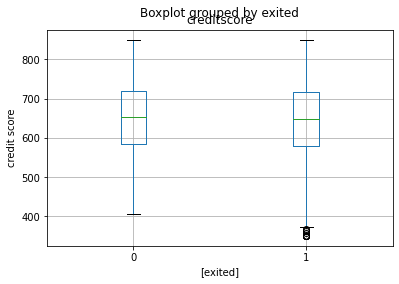

In [16]:
# menampilkan boxplot creditscore masing-masing nasabah yang keluar dan tidak
good_client_credit_score.boxplot(by='exited')

plt.ylabel('credit score')

Based on the graph above, information is obtained that the number of customer credit scores coming out and not being nearly the same is around `650`.

Next, we explore the geography column.

### `geography`

In [17]:
# mengambil informasi geopgraphy nasabah
geo_percent = good_client.groupby('exited')['geography'].value_counts(normalize=True).mul(100).round(2).astype('str')+"%"
geo_percent

exited  geography
0       France       52.74%
        Spain        25.95%
        Germany      21.31%
1       Germany      40.51%
        France       39.54%
        Spain        19.96%
Name: geography, dtype: object

Based on the information above, it is known that customers with domiciles in **Germany** are the ones who choose to leave the most, namely **40.51%** of the total *exited* customers, but also come from other regions, namely `France` and `Spain`, so it can be seen that customers who decide to leave are not focused on one country of domicile.

### `gender`

In [18]:
# mengambil informasi gender nasabah
gender_percent = good_client.groupby('exited')['gender'].value_counts(normalize=True).mul(100).round(2).astype('str')+"%"
gender_percent

exited  gender
0       Male       57.5%
        Female     42.5%
1       Female    56.15%
        Male      43.85%
Name: gender, dtype: object

Based on the information above, it is known that the number of customers who leave is slightly higher for the 'female' gender, so it can be concluded that the customers who leave are not focused on one gender.

### `age`

In [19]:
# mengambil informasi creditscore masing-masing nasabah
good_client_age = good_client[['age', 'exited']]
good_client_age

,age,exited
0,42,1
1,41,0
2,42,1
3,39,0
4,43,0
...,...,...
9994,29,0
9995,39,0
9996,35,0
9997,36,1


Text(0, 0.5, 'age')

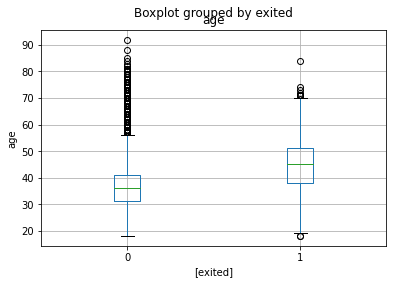

In [20]:
# menampilkan boxplot creditscore masing-masing nasabah yang keluar dan tidak
good_client_age.boxplot(by='exited')

plt.ylabel('age')

From the boxplot graph above, information can be found that generally customers who leave are around `45 years old`, where age 45 can be said to be the age that is about to enter old age (unproductive), this is inversely proportional to customers who continue with the contract, who are generally still aged productive in the range of `35 years`.

### `tenure`

In [21]:
# mengambil informasi creditscore masing-masing nasabah
good_client_tenure = good_client[['tenure', 'exited']]
good_client_tenure

,tenure,exited
0,2.0,1
1,1.0,0
2,8.0,1
3,1.0,0
4,2.0,0
...,...,...
9994,2.0,0
9995,5.0,0
9996,10.0,0
9997,7.0,1


Text(0, 0.5, 'tenure')

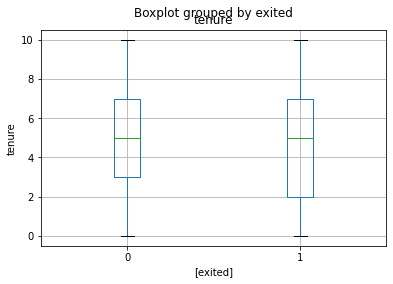

In [22]:
# menampilkan boxplot creditscore masing-masing nasabah yang keluar dan tidak
good_client_tenure.boxplot(by='exited')

plt.ylabel('tenure')

Based on the graph above, information is obtained that the number of customer deposit tenures leaving and not being nearly the same is around `5 years'.

### `balance`

In [23]:
# mengambil informasi creditscore masing-masing nasabah
good_client_balance = good_client[['balance', 'exited']]
good_client_balance

,balance,exited
0,0.00,1
1,83807.86,0
2,159660.80,1
3,0.00,0
4,125510.82,0
...,...,...
9994,0.00,0
9995,0.00,0
9996,57369.61,0
9997,0.00,1


Text(0, 0.5, 'balance')

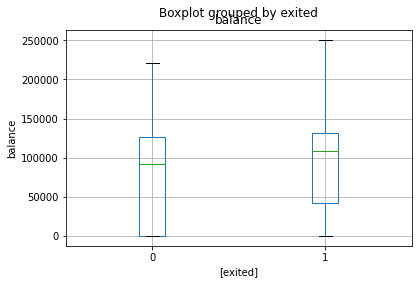

In [24]:
# menampilkan boxplot creditscore masing-masing nasabah yang keluar dan tidak
good_client_balance.boxplot(by='exited')

plt.ylabel('balance')

From the graph above, interesting things are obtained:
1. The whisker at the bottom of the data boxplot for customers who did not leave is at `0`, meaning that most customers who did not leave have a balance that is close to `0`.
2. Customers who choose to leave generally have a balance in the range of `100,000`, but this is not much different from customers who continue the contract.

### `number of products`

In [25]:
# mengambil informasi creditscore masing-masing nasabah
good_client_np = good_client[['numofproducts', 'exited']]
good_client_np

,numofproducts,exited
0,1,1
1,1,0
2,3,1
3,2,0
4,1,0
...,...,...
9994,2,0
9995,2,0
9996,1,0
9997,1,1


Text(0, 0.5, 'jumlah produk')

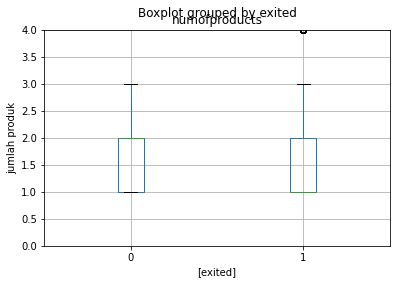

In [26]:
# menampilkan boxplot creditscore masing-masing nasabah yang keluar dan tidak
good_client_np.boxplot(by='exited')

plt.ylim(0, 4)
plt.ylabel('jumlah produk')

From the graph above, information is obtained that most customers who leave or do not only have 1 type of product, so it can be concluded temporarily that only using 1 product service does not always encourage customers to leave.

### `credit card`

In [27]:
# mengambil informasi gender nasabah
credit_percent = good_client.groupby('exited')['hascrcard'].value_counts(normalize=True).mul(100).round(2).astype('str')+"%"
credit_percent

exited  hascrcard
0       1            70.62%
        0            29.38%
1       1            70.01%
        0            29.99%
Name: hascrcard, dtype: object

From the information above, it is known that most customers who decide to leave have a credit card; this is the same as customers who remain customers, so it can be concluded temporarily that customers who choose to leave are not always driven by having a credit card.

### `is active member`

In [28]:
# mengambil informasi gender nasabah
gender_percent = good_client.groupby('exited')['isactivemember'].value_counts(normalize=True).mul(100).round(2).astype('str')+"%"
gender_percent

exited  isactivemember
0       1                 55.48%
        0                 44.52%
1       0                 63.75%
        1                 36.25%
Name: isactivemember, dtype: object

From the information above, it is known that most customers who decide to leave are not active members, so it can be concluded that member inactivity may trigger customers to decide against it, but not always.

### `estimated salary`

In [29]:
# mengambil informasi creditscore masing-masing nasabah
good_client_salary = good_client[['estimatedsalary', 'exited']]
good_client_salary

,estimatedsalary,exited
0,101348.88,1
1,112542.58,0
2,113931.57,1
3,93826.63,0
4,79084.10,0
...,...,...
9994,167773.55,0
9995,96270.64,0
9996,101699.77,0
9997,42085.58,1


Text(0, 0.5, 'estimaed gaji')

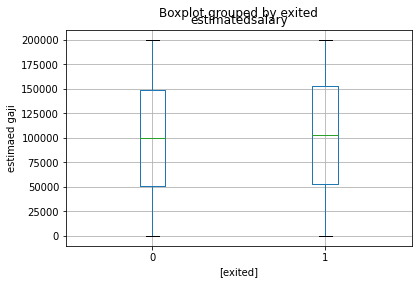

In [30]:
# menampilkan boxplot creditscore masing-masing nasabah yang keluar dan tidak
good_client_salary.boxplot(by='exited')

plt.ylabel('estimaed gaji')

From the graph above, information is obtained that the estimated salary for customers who decide to leave or not is almost the same around `100,000`.

**Findings**

Based on data exploration, it can be concluded that there is almost no difference in the behavior of customers who decide to terminate the contract or not, but customers who are `45 years old` or domiciled in `Germany` tend to terminate their contracts as bank customers.

## Data Pre-Processing

### Correlation Between Features and Variable Selection

To see the correlation between features and targets in the `good_client` dataset, you will use the **.corr()** function.

<AxesSubplot:>

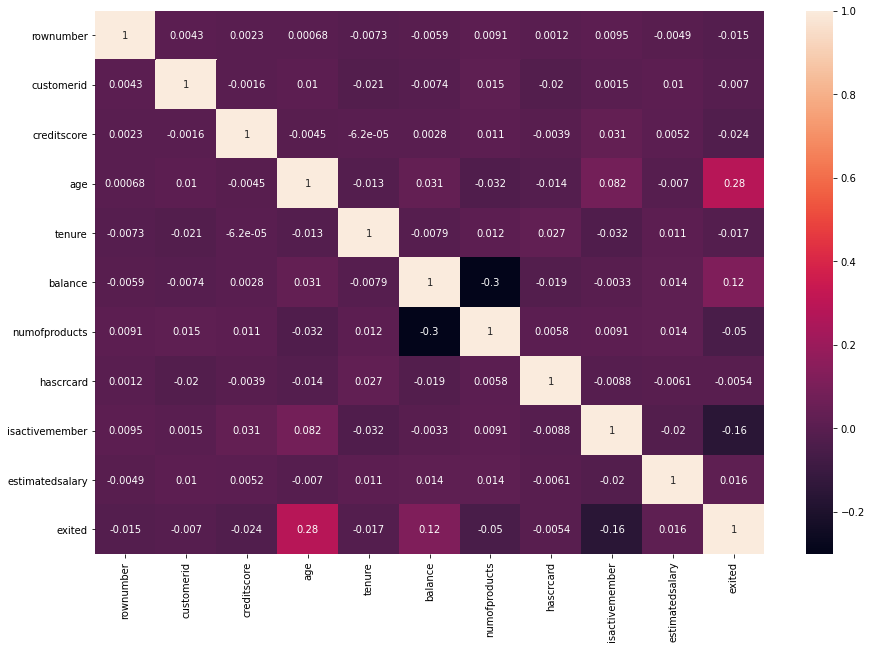

In [31]:
# menampilkan korelasi antar fitur numerik dan target
from matplotlib.pyplot import figure
figure(figsize = (15,10))
sns.heatmap(good_client.corr(), annot=True)

Based on the correlation value information above, it is known that the correlation value between features and targets is quite low. The same thing also happens between other features; although there is a fairly large value of `0.28` in the `age` feature with the `exited` target, it is not significantly correlated. Some columns also have very low correlation and are not related to predicting exited customers, such as the columns `rownumber`, `customerid`, and `surname` so that these columns will be dropped from the dataset.

In [32]:
# menyeleksi feature dan target
new_client =  good_client.drop(['rownumber', 'customerid', 'surname'], axis=1)
new_client

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9994,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1


### Preparing Features

According to the preliminary finding information, it is known that there are several features that have the form of object or string data, namely the `geography` and `gender` columns stored in the `new_good_client` variable, which need to be encoded using **One-Hot Encoding** with the help of the **.get_dummies()** function.

#### One-Hot encoding

In [33]:
# melakukan pengkodean kolom geography dan gender
geo = pd.get_dummies(new_client['geography'], drop_first=True)
gender = pd.get_dummies(new_client['gender'], drop_first=True)

In [34]:
# droppping kolom kategoriikal pada dataset new_client
new_client = new_client.drop(['geography', 'gender'], axis=1)
new_client

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,42,2.0,0.00,1,1,1,101348.88,1
1,608,41,1.0,83807.86,1,0,1,112542.58,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1
3,699,39,1.0,0.00,2,0,0,93826.63,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9994,800,29,2.0,0.00,2,0,0,167773.55,0
9995,771,39,5.0,0.00,2,1,0,96270.64,0
9996,516,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,36,7.0,0.00,1,0,1,42085.58,1


In [35]:
# menggabungkan pengkodean kolom geography dan gender pada dataset new_client
new_client = pd.concat([new_client, geo, gender], axis=1)
new_client.loc[5752:]

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,Germany,Spain,Male
5753,760,41,6.0,0.00,2,0,0,101491.23,0,0,1,0
5754,714,45,9.0,106431.97,2,1,1,164117.69,0,1,0,0
5755,717,50,9.0,90305.76,1,1,1,124626.57,0,0,0,1
5756,645,28,7.0,117466.03,2,1,1,34490.06,0,1,0,1
5757,681,32,3.0,148884.47,2,1,1,90967.37,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,800,29,2.0,0.00,2,0,0,167773.55,0,0,0,0
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0


#### Prepare `training_set` dan `test_set`

In [36]:
# menyiapkan feature dan target dari dataset new_client
new_client_x = new_client.drop(['exited'], axis=1)
new_client_y = new_client['exited']

According to the results of the previous data exploration, it is known that the percentage of customers who left and are not stored in the `prop_exited` variable The proportion will be displayed again.

In [37]:
# menampilkan variabel prop_exited
prop_exited

,percent%,count
exited,,
0,79.61%,7237
1,20.39%,1854


It is known that the proportion of customers who leave and not is 79.61% and 20.39% and 2 datasets are needed from the `new_client` data set, therefore *splitting* data will use the help of the **TrainSplitTest** function with the stratify parameter from the Scikit-learn library so that the *splitting* data results obtained are proportional and representative of the initial data_set.

Proportional training, validation and test data as follows:
1. Training_set - `client_train` **80%**
2. Test_set - `client_test` **20%**

In [38]:
# mengimport fungsi train split test dari modul model_slection
from sklearn.model_selection import train_test_split

In [39]:
# melakukan splitting data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(new_client_x, new_client_y, test_size= 0.2,
                                                    random_state=0, stratify=new_client_y)

In [40]:
# menampilkan ukuran dataset baru
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (7272, 11)
Shape of x_test is:  (1819, 11)
Shape of y_train is: (7272,)
Shape of y_test is:  (1819,)


Splitting data was successful. The next step is to resolve the `class imbalance`.

### Resample

To overcome the `class imbalance` a resample technique will be performed and `upsampling` of the x_train_scaled dataset. This technique is performed based on the proportion of labels contained in the `prop_exited` variable. The proportion will be displayed again.

In [41]:
prop_exited

,percent%,count
exited,,
0,79.61%,7237
1,20.39%,1854


Based on the proportion information above, the ratio of labels `1` and `0` is **1:4**, so the observation of label `1` will be increased by `4x`. In general, this `upsampling` technique is done by:
1. Splitting `x_train_scaled` and `y_train` into `1` and `0` label observations.
2. Duplicate the observation labeled `1` by 4x.
3. Create a new training sample based on the obtained data.
4. Shuffle the new data samples. To simplify the data, first import it from `modulesklearn.utils`.

In [42]:
# mengimport fungsi shuffle
from sklearn.utils import shuffle

# membuat fungsi upsampling
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_train_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_train_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_train_upsampled, target_train_upsampled = shuffle(
    features_train_upsampled, target_train_upsampled, random_state=12345
    )
    
    return features_train_upsampled, target_train_upsampled

# menerapkan fungsi upsampling pada dataset train
new_x_train, new_y_train = upsample(
x_train, y_train, 4)

In [43]:
# menampilkan ukuran dataset train
print("Shape of x_train is:",new_x_train.shape)
print("Shape of y_train is:",new_y_train.shape)

Shape of x_train is: (11721, 11)
Shape of y_train is: (11721,)


Upsampling has been completed. Next, do the **Model Development**.

## Model Development

Some of the models that will be trained and developed for the classification of datasets that have class imbalances are:
- **Decision Tree**
- **Random Forest**
- **XGBoost**

From the 3 models, we will train the model and check the **accuracy** value, and then evaluate it with the metrics **precision**, **recall**, **f1_score**, **confusion matrix**, **roc_curve**, and **roc_auc_score** where the expected target is that the f1_score reaches a value above **0.59**.

In [44]:
# mengimport fungsi perhitungan metric evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

### Decision Tree Model

The first model developed is the **decision tree**. The tools to be used are taken from the **sklearn** library **tree** module **DecisionTreeClassifier** class.

In [45]:
# mengimport kelas decisiontreeclassifier dari modul tree di library scikit-learn
from sklearn.tree import DecisionTreeClassifier

In [46]:
# melatih model dengan features dan target client_train dan melakukan tunning hyperparameter model decision tree
for depth in range (1,10):
    model = DecisionTreeClassifier(random_state = 42, max_depth =depth)
    model.fit(new_x_train, new_y_train)
    prediction_train = model.predict(new_x_train)
    
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(new_y_train, prediction_train))

max_depth = 1 : 0.6915792167903763
max_depth = 2 : 0.7154679634843444
max_depth = 3 : 0.7275829707362853
max_depth = 4 : 0.7430253391348861
max_depth = 5 : 0.768364474020988
max_depth = 6 : 0.7840627932770241
max_depth = 7 : 0.7995051616756249
max_depth = 8 : 0.8157153826465319
max_depth = 9 : 0.8351676478116201


The results are quite good, and the accuracy obtained is quite high. The best accuracy of the model is obtained **0.83** at a depth of `max_depth = 9`. The results of this hyperparameter tuning will be applied for model prediction on the x_test dataset.

In [47]:
# melatih model hasil tunning hyperparameter max_depth = 9
model_dt = DecisionTreeClassifier(random_state=42, max_depth=9)
model_dt.fit(new_x_train, new_y_train)
prediction_train = model_dt.predict(new_x_train)

# melakukan testing model untuk prediksi target pada dataset test
prediction_test_1 = model_dt.predict(x_test)

# menghitung skor akurasi
train_accr = accuracy_score(new_y_train, prediction_train)
test_accr = accuracy_score(y_test, prediction_test_1)

print('Accuracy :')
print('Train_set :', train_accr)
print('Test_set :', test_accr)

Accuracy :
Train_set : 0.8351676478116201
Test_set : 0.7822979659153381


The accuracy obtained on the `test_set` dataset is quite high, at **0.78** but slightly lower than the accuracy score on the `train_test` dataset. There is a small possibility that this model is **overfitting**.

Next, we checked the evaluation metric.

In [48]:
# menghitung skor metric evaluasi
precision = precision_score(y_test, prediction_test_1)
recall = recall_score(y_test, prediction_test_1)
f1 = f1_score(y_test, prediction_test_1)

print('Skor presisi test_set:', precision)
print('Skor recall test_set:', recall)
print('Skor F1 test_set::', f1)

Skor presisi test_set: 0.4776386404293381
Skor recall test_set: 0.7196765498652291
Skor F1 test_set:: 0.5741935483870967


From the information above, it is known that the quality of the model is quite good, where the `f1_score` value is **0.57**, a little closer to the target, it will be displayed more clearly through the confusion matrix.

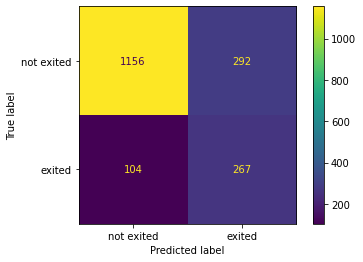

In [49]:
# mengimport fungsi confusion matrix dari modul metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# menampilkan confusion matrix
cm_dt = confusion_matrix(y_test, prediction_test_1, labels=[0,1])
disp_dt = ConfusionMatrixDisplay(confusion_matrix = cm_dt,
                                 display_labels=['not exited', 'exited'])
disp_dt.plot()

From the information above, it is known that as many as **267** predictions are *true positive*, which means that the model is able to predict as many as `267` customers who will come out correctly, but there are still as many as `292` *false positive* predictions so the precision score is quite low.

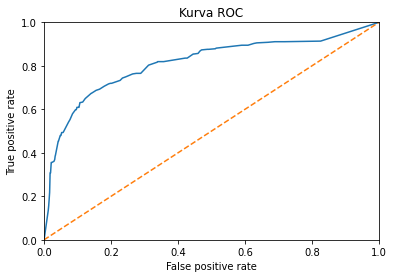

In [50]:
# menampilkan roc curve dan skor roc_auc
probabilities_test = model_dt.predict_proba(x_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle ="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.title('Kurva ROC')

plt.show()

In [51]:
# menampilkan nilai roc_auc
auc_roc = roc_auc_score(y_test, probabilities_one_test)
auc_roc

0.8124134413486024

The roc_auc score is quite high at 0.81 which indicates that the model is capable of predicting `1` and `0` responses.

**Feature Importance**

Feature: 0, Score: 0.04619
Feature: 1, Score: 0.37333
Feature: 2, Score: 0.01812
Feature: 3, Score: 0.13651
Feature: 4, Score: 0.22491
Feature: 5, Score: 0.00551
Feature: 6, Score: 0.05750
Feature: 7, Score: 0.07436
Feature: 8, Score: 0.03397
Feature: 9, Score: 0.00430
Feature: 10, Score: 0.02531


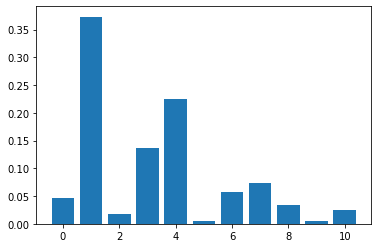

In [52]:
# mendapatkan importance
importance = model_dt.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
          
# menampilkan grafik features importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Based on the graph above, it is known that for the `Decision Tree` feature importance model with a value above 0.1 is :
- `age`
- `balance`
- `numofproducts`

### Random Forest Model

The second model developed is **random forest**. The tools to be used are taken from the **sklearn** library **ensemble** module **RandomForestClassifier** class.

In [53]:
# mengimport RandomForestClassifier dari modul ensemble di library scikit-learn
from sklearn.ensemble import RandomForestClassifier

The next step is to train and develop the model. To improve the model, the number of trees or *n_estimators* hyperparameters, will be tuned.

In [54]:
# melatih model dengan features dan target client_train dan melakukan tunning hyperparameter n_estimators
best_score = 0
best_est = 0
for est in range(1,8):
    model = RandomForestClassifier(random_state=54321, n_estimators=est)
    model.fit(new_x_train, new_y_train)
    score = model.score(new_x_train, new_y_train)
    if score > best_score:
        best_score = score
        best_est = est
print("Accuracy model terbaik pada dataset client_valid (n_estimators = {}): {}".format(best_est, best_score))

Accuracy model terbaik pada dataset client_valid (n_estimators = 6): 0.9977817592355601


The results are quite good, and the accuracy obtained is quite high, where the best accuracy of the model is obtained at **0.99** at `n_estimators = 8`. The results of this hyperparameter tunning will be applied for model prediction on the x_test dataset.

In [55]:
# melatih model hasil tunning hyperparameter n_estimators=8
model_rf = RandomForestClassifier(random_state=54321, n_estimators=8)
model_rf.fit(new_x_train, new_y_train)
prediction_train = model_rf.predict(new_x_train)

# melakukan testing model untuk prediksi dataset test
prediction_test_2 = model_rf.predict(x_test)

# menghitung skor akurasi
train_accr = accuracy_score(new_y_train, prediction_train)
test_accr = accuracy_score(y_test, prediction_test_2)

print('Accuracy :')
print('Train_set :', train_accr)
print('Test_set :', test_accr)

Accuracy :
Train_set : 0.9982083439979524
Test_set : 0.8559648158328752


The accuracy obtained on the `test_set` dataset is quite high, at **0.85**, but slightly lower than the accuracy score on the `train_test` dataset. There is a small possibility that this model is **overfitting**.

Next, we checked the evaluation metric.

In [56]:
# menghitung skor metric evaluasi
precision = precision_score(y_test, prediction_test_2)
recall = recall_score(y_test, prediction_test_2)
f1 = f1_score(y_test, prediction_test_2)

print('Skor presisi test_set:', precision)
print('Skor recall test_set:', recall)
print('Skor F1 test_set::', f1)

Skor presisi test_set: 0.6912280701754386
Skor recall test_set: 0.5309973045822103
Skor F1 test_set:: 0.6006097560975611


From the information above, it is known that the model quality is quite good, where the `f1_score` value is **0.60**, and has exceeded the target. It will be shown more clearly through the confusion matrix.

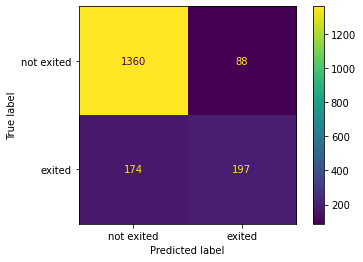

In [57]:
# menampilkan confusion matrix
cm_rf = confusion_matrix(y_test, prediction_test_2, labels=[0,1])
disp_rf = ConfusionMatrixDisplay(confusion_matrix = cm_rf,
                                 display_labels=['not exited', 'exited'])
disp_rf.plot()

From the information above, it is known that as many as **197** predictions are *true positive*, which means that the model is able to predict as many as `197` customers who will come out correctly, but there are still as many as `174` *false negative* predictions, so the recall score is quite low.

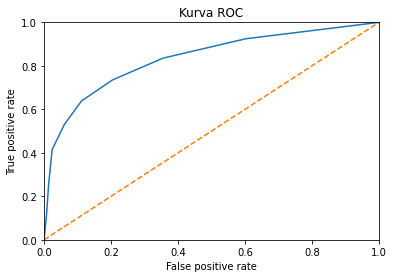

In [58]:
# menampilkan roc curve dan skor roc_auc
probabilities_test = model_rf.predict_proba(x_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle ="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.title('Kurva ROC')

plt.show()

In [59]:
# menampilkan nilai roc_auc
auc_roc = roc_auc_score(y_test, probabilities_one_test)
auc_roc

0.8344644904766869

The high ROC_AUC score of 0.83 indicates that the model is capable of predicting both `1` and `0` answers and effectively predicts quite accurately.

**Feature Importance**

Feature: 0, Score: 0.13278
Feature: 1, Score: 0.24621
Feature: 2, Score: 0.08277
Feature: 3, Score: 0.14521
Feature: 4, Score: 0.12488
Feature: 5, Score: 0.01660
Feature: 6, Score: 0.03559
Feature: 7, Score: 0.14354
Feature: 8, Score: 0.03661
Feature: 9, Score: 0.01308
Feature: 10, Score: 0.02271


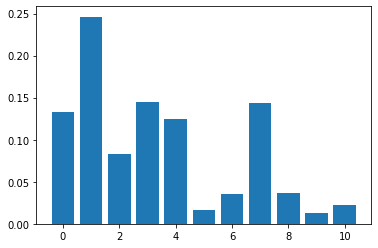

In [60]:
# mendapatkan importance
importance = model_rf.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
          
# menampilkan grafik features importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Based on the graph above, it is known that the `Random Forest` feature importance model with values above 0.1 is:
- `credit_score`
- `age`
- `balance`
- `number_of_products`
- `estimated_salary`

### XGBoost Model

The third model to be developed is the **XGBoost** model. The first step is to perform hyperparameter optimization with the help of the **RandomizedSearchCV** function from the sklearn.model_selection module.

In [1]:
# mengimport model xgboost dan fungsi randomizedsearchcv
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# optimasi hyperparameter
params = {
    "learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth" : [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [1, 3, 5, 7],
    "gamma" : [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.7]
}

In [2]:
# membuat instance
model_xgb = XGBRegressor()

In [63]:
# tunning hyperparameter
random_search = RandomizedSearchCV(model_xgb,param_distributions=params,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [64]:
# melakukan optimasi
random_search.fit(new_x_train, new_y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[13:43:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=7; total time=   1.2s
[13:43:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=7; total time=   1.2s
[13:43:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=7; total time=   1.3s
[13:43:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=7; total time=   1.6s
[13:43:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=7; total time=   1.3s
[13:43:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=7; total time=   3.0s
[13:43:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=7; total time=   2.9s
[13:44:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=7; total time=   3.3s
[13:44:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=7; total time=   2.9s
[13:44:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=7; total time=   2.9s
[13:44:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=5; total time=   2.7s
[13:44:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=5; total time=   2.8s
[13:44:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=5; total time=   2.6s
[13:44:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=5; total time=   2.5s
[13:44:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=5; total time=   2.8s
[13:44:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=10, min_child_weight=5; total time=   2.7s
[13:44:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=10, min_child_weight=5; total time=   2.7s
[13:44:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=10, min_child_weight=5; total time=   2.7s
[13:44:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=10, min_child_weight=5; total time=   3.0s
[13:44:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=10, min_child_weight=5; total time=   2.8s
[13:44:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5; total time=   2.0s
[13:44:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5; total time=   2.1s
[13:44:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5; total time=   2.5s
[13:44:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5; total time=   2.2s
[13:44:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5; total time=   2.1s
[13:44:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                       

In [73]:
# menampilkan tunning hyperparameter terbaik
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 10,
 'learning_rate': 0.15,
 'gamma': 0.0,
 'colsample_bytree': 0.4}

The hyperparameter optimization results have been obtained. These tuning results will then be used for training the `XGBoost` model.

In [74]:
# melatih model xgboost
model_xg = xgb.XGBClassifier(colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=10,
              min_child_weight=5)
model_xg.fit(new_x_train, new_y_train)
prediction_train = model_xg.predict(new_x_train)

# memprediksi target dataset test
prediction_test_3 = model_xg.predict(x_test)

# menghitung skor akurasi
train_accr = accuracy_score(new_y_train, prediction_train)
test_accr = accuracy_score(y_test, prediction_test_3)

print("Accuracy Train_set:", train_accr)
print("Accuracy Test_set:", test_accr)

/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:45:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Train_set: 0.9796092483576486
Accuracy Test_set: 0.8411214953271028


The accuracy result obtained on the `client_test` dataset is high, reaching **0.84**, but quite low below the train dataset; possibly overfitting occurs on this dataset. Next, the evaluation metric score will be checked.

In [75]:
# menghitung skor metric evaluasi
precision = precision_score(y_test, prediction_test_3)
recall = recall_score(y_test, prediction_test_3)
f1 = f1_score(y_test, prediction_test_3)

print('Skor presisi test_set:', precision)
print('Skor recall test_set:', recall)
print('Skor F1 test_set::', f1)

Skor presisi test_set: 0.5995145631067961
Skor recall test_set: 0.6657681940700808
Skor F1 test_set:: 0.6309067688378034


From the information above, it is known that the quality of the model is quite good, where the `f1_score` value is **0.63**, and has exceeded the target. It will be shown more clearly through the confusion matrix.

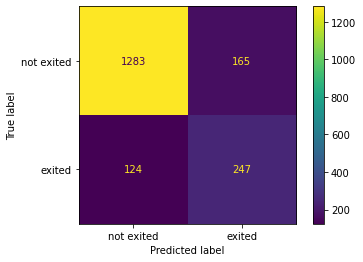

In [76]:
# menampilkan confusion matrix
cm_rf = confusion_matrix(y_test, prediction_test_3, labels=[0,1])
disp_rf = ConfusionMatrixDisplay(confusion_matrix = cm_rf,
                                 display_labels=['not exited', 'exited'])
disp_rf.plot()

From the information above, it is known that as many as **247** predictions are *true positive*, which means that the model is able to predict as many as `247` customers who will come out correctly, but there are still as many as `165` *false negative* predictions, so the precision score is quite low.

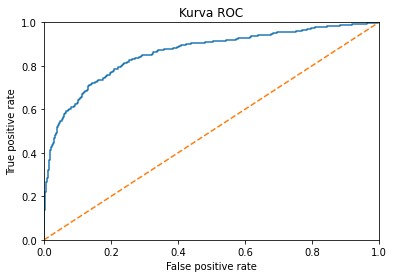

In [77]:
# menampilkan roc curve dan skor roc_auc
probabilities_test = model_xg.predict_proba(x_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle ="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.title('Kurva ROC')

plt.show()

In [78]:
# menampilkan nilai roc_auc
auc_roc = roc_auc_score(y_test, probabilities_one_test)
auc_roc

0.8595143780435139

The very high ROC_AUC score of 0.85 indicates that the model is able to predict both `1` and `0` answers and effectively predicts quite accurately.

**Feature Importance**

Feature: 0, Score: 0.02738
Feature: 1, Score: 0.05331
Feature: 2, Score: 0.01701
Feature: 3, Score: 0.03562
Feature: 4, Score: 0.56959
Feature: 5, Score: 0.01533
Feature: 6, Score: 0.11559
Feature: 7, Score: 0.03031
Feature: 8, Score: 0.07849
Feature: 9, Score: 0.02257
Feature: 10, Score: 0.03480


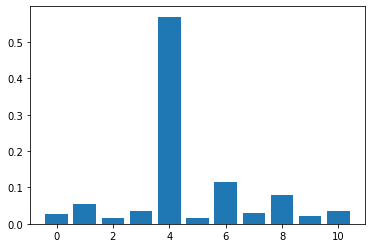

In [79]:
# mendapatkan importance
importance = model_xg.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
          
# menampilkan grafik features importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Based on the graph above, it is known that the `XGBoost` feature importance model with a value above 0.05 is :
- `age`
- `number_of_products`
- `is_active_member`
- `germany_area`

## General Conclusion

The dataset obtained is historical data on Beta Bank customer behavior, consisting of 10,000 rows (observations) and 14 columns. Based on initialization and initial data exploration, the following information is obtained:
1. There is a missing value in the `tenure` column of 9.09%, which is then dropped from the dataset.
2. There is no duplication in the initial dataset.
3. There is categorical data in the data set, namely the `geography` and `gender` columns, which are then labeled with the **One-Heat Encoding** technique.
4. Customers who are above `45 years old` and above or domiciled in `germany` areas are more likely to terminate the contract with Beta Bank.
5. There is a `class imbalance` in the dataset, so to overcome it, a resample is done with the **upsampling** technique on the `positive or 1` class label.

From this dataset, data *splitting* is then carried out with the help of the **train_split_test** function with the **stratify** parameter (so that the proportion of class labels is representative of the initial dataset) to get the `training_set` and `test_set` data sets.

From the two datasets, the **Decision Tree**, **Random Forest**, and **XGBoost** models were developed where hyperparameter tuning was previously carried out to get the best hyperparameter with high accuracy values. After predicting the `test_set` data set, the model with the best evaluation metric is the **XGBoost** model, where the accuracy value obtained is **0.84** and f1_score is **0.63**, and there is no overfitting in this model. The features important to this model are `age`, `number_of_products`, `is_active_member`, and `geography`, which are related to the initial data exploration results, so that banks can focus on providing services to customers who are over `45 years old` and reside in the `Germany` area.